In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
# import tensorflow as tf
# tf.__version__
# tf.test.is_built_with_cuda()
# tf.test.is_gpu_available()

In [38]:
# ! pip install matplotlib

  Using cached matplotlib-3.3.3-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)


In [2]:
model = ResNet50(weights='imagenet', include_top=True)
# model_path = "resnet50_weights_tf_dim_ordering_tf_kernels.h5"
# model = keras.models.load_model(model_path)

In [3]:
import os

In [20]:
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0) # make it 4D
    x = preprocess_input(x)
    return img,x

def process_arr(array):
#     plt.imshow(array); plt.show()
    x = np.expand_dims(array,axis=0) # make it 4D
    x = preprocess_input(x)
    return img,x

In [5]:
folder = 'images'
files = os.listdir(folder)
for i,file in enumerate(files):
    print(i,file)

0 bike.jpg
1 biker-gang.jpg
2 cat.png
3 elephant.jpg
4 example.jpg
5 horse.png
6 horse_query.png
7 musk.jpg
8 party.png


images\elephant.jpg


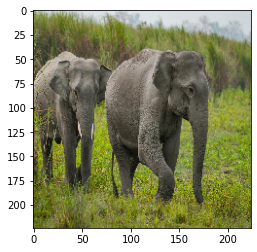

101


[[('n01871265', 'tusker', 0.5438297),
  ('n02504458', 'African_elephant', 0.2928014),
  ('n02504013', 'Indian_elephant', 0.16282576)]]

In [6]:
img_path = os.path.join(folder,files[3]); print(img_path)
img, processed_image = load_image(img_path)
plt.imshow(img)
plt.show()
preds = model.predict(processed_image); print(np.argmax(preds))
decode_predictions(preds,top=3)

In [49]:
# okay so the whole image is 224x224
# 112 is the half - can split the whole image into 
# 4 parts and see where the hathi is maximum

In [48]:
224/2

112.0

In [10]:
# converting the predicted image to array - loaded from preprocess keras
img_arr = np.array(img)
img_arr.shape

(224, 224, 3)

In [8]:
import cv2

In [12]:
# display image with cv2 - works only on local pc - on colab it will crash
# display in external window
cv2.imshow('test',img_arr)
cv2.waitKey(0)
cv2.destroyAllWindows()

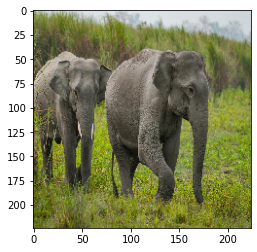

In [61]:
# show directly in the cell output
plt.imshow(img_arr)

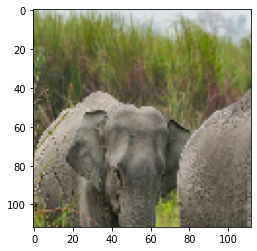

In [63]:
# making half using slicing of array - image already into array
img_half = img_arr[:112,:112]
plt.imshow(img_half)

In [ ]:
# Testing and finding the sample space required

# output in the form of coordinates 
# 0,112 0,112
# 0,112 112,224
# 112,224 0,112
# 112,224 112,224

# i,j coordinates output from system
# 0,1 0,1
# 0,1 1,2
# 1,2 0,1
# 1,2 1,2

In [26]:
# iteration 1: testing the coordiantes
# a failed approach for coordinates - not giving accurate results
for i in range(2):
    for j in range(1,3):
        ys=(i)*112
        xs=(j)*112
        ye=i*112
        xe=j*112
        
        print(ys,xs,ye,xe)
#         img_half = img_arr[:112,:112]
#         img_half = img_arr[112*(2-i):112*i,112*(2-j):112*j]
#         plt.imshow(img_half)
#         plt.show()

0 112 0 112
0 224 0 224
112 112 112 112
112 224 112 224


In [30]:
# figure plotting Utils

# fig = plt.figure()
# rows=cols=2
# fig.set_size_inches(cols * 3, rows * 3)
# ctr = 0

# for y in range(1,3):
#     for x in range(1,3):
#         plt.subplot(rows, cols, ctr + 1)
#         ctr+=1 # iterate for the plot 
#         plt.axis('off')
#         plt.imshow(your_image.copy()) # not to affect the other copy
#         plt.title(f"{pred[1]}{pred[2]:.2f}") # formatting the fstring for limited precision

101
101
101
101


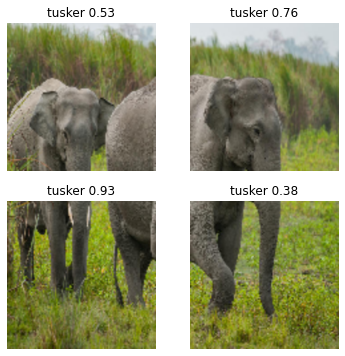

In [33]:
# iteration 2 : hardcoded approach for 4 splits in image array
# plot image in grid
win = 112

fig = plt.figure()
rows=cols=2
fig.set_size_inches(cols * 3, rows * 3)
ctr = 0

for y in range(1,3):
    for x in range(1,3):
        img_half = img_arr[win*(1-y):win*y,win*(1-x):win*x]
        img_half = cv2.resize(img_half,(224,224))
        img, processed_image = process_arr(img_half)
        preds = model.predict(processed_image); print(np.argmax(preds))
        pred = decode_predictions(preds,top=1)[0][0]
        
        plt.subplot(rows, cols, ctr + 1)
        ctr+=1
        plt.axis('off')
        plt.imshow(img_half.copy())
        plt.title(f"{pred[1]} {pred[2]:.2f}")
    
#         print(pred)

In [28]:
# iteration 3 : trying to focus on different row column approach
win = int(224/3)

for y in range(1,4):
    for x in range(1,4):
        print(win*(3-y),win*y,win*(3-x),win*x)
#         img_half = img_arr[win*(1-y):win*y,win*(1-x):win*x]
#         img_half = cv2.resize(img_half,(224,224))
#         img, processed_image = process_arr(img_half)
#         preds = model.predict(processed_image); print(np.argmax(preds))
#         pred = decode_predictions(preds,top=1)[0]
#         print(pred)

148 74 148 74
148 74 74 148
148 74 0 222
74 148 148 74
74 148 74 148
74 148 0 222
0 222 148 74
0 222 74 148
0 222 0 222


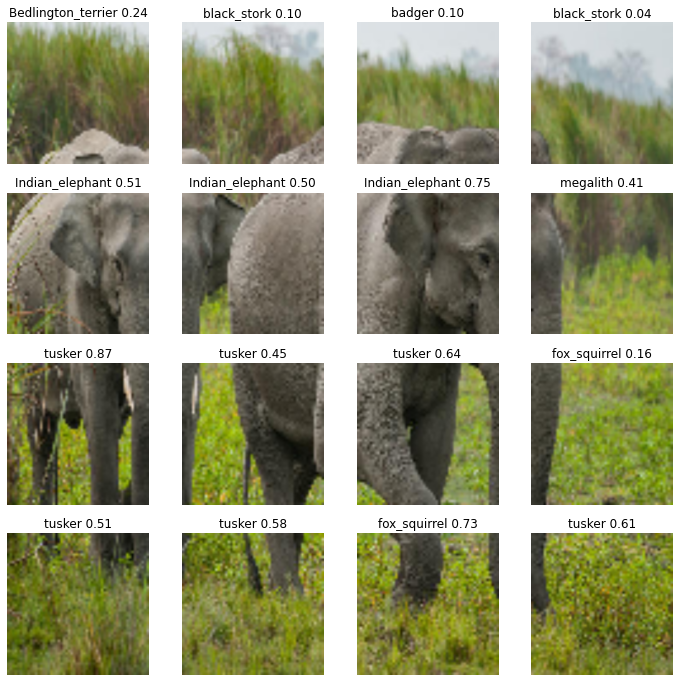

In [43]:
# iteration 4: row col approach fixed wrt to window 
w = 4
win = int(224/w)
coords = []

fig = plt.figure()
rows=cols=w
fig.set_size_inches(cols * 3, rows * 3)
ctr = 0

for y in range(1,1+w):
    for x in range(1,1+w):
        coord = [win*(x-1),win*(y-1),win*(x),win*(y)]
        img_half = img_arr[coord[1]:coord[3],coord[0]:coord[2]]
        img_half = cv2.resize(img_half,(224,224))
        img, processed_image = process_arr(img_half)
        preds = model.predict(processed_image)
        pred = decode_predictions(preds,top=1)[0][0]
        coords.append([coord,pred])

        # print(coord); print(pred) ; print(np.argmax(preds))
        
        plt.subplot(rows, cols, ctr + 1)
        ctr+=1
        plt.axis('off')
        plt.imshow(img_half.copy())
        plt.title(f"{pred[1]} {pred[2]:.2f}")
plt.savefig('my_plot.jpg')
plt.show()

In [34]:
coords

[[[0, 0, 74, 74], ('n02504013', 'Indian_elephant', 0.54474896)],
 [[74, 0, 148, 74], ('n01871265', 'tusker', 0.1679612)],
 [[148, 0, 222, 74], ('n01871265', 'tusker', 0.34305874)],
 [[0, 74, 74, 148], ('n01871265', 'tusker', 0.9461405)],
 [[74, 74, 148, 148], ('n02504013', 'Indian_elephant', 0.53004456)],
 [[148, 74, 222, 148], ('n01871265', 'tusker', 0.79780126)],
 [[0, 148, 74, 222], ('n01871265', 'tusker', 0.313963)],
 [[74, 148, 148, 222], ('n01871265', 'tusker', 0.7466143)],
 [[148, 148, 222, 222], ('n01871265', 'tusker', 0.34076205)]]

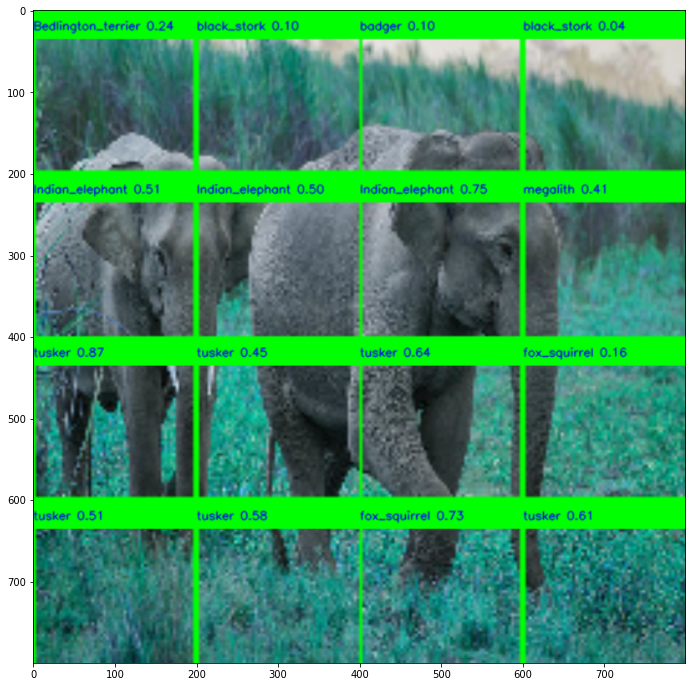

In [54]:
# using the cv2 module and 
# this part crops the whole image into boxes and predicts the portion of the image where it belongs

img_draw = img_arr.copy()

font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 0.4
color = (255, 0, 0) 
thickness = 1


# it requires x,y x,y as input - and not y,y x,x - that is the input for the array
for coord in coords:
    img_draw = cv2.rectangle(img_draw,coord[0], (0,255,0), 1) 

nw = 224*3
img_draw = cv2.resize(img_draw,(nw,nw))

for coord in coords:
    org = (coord[0][0]*int(nw/224), coord[0][1]*int(nw/224)+20) 
    cv2.rectangle(img_draw,[org[0],org[1]-20,224,30], (0,255,0), -1) 
    cv2.putText(img_draw, f"{coord[1][1]} {coord[1][2]:0.2f}", org, font, fontScale, color, thickness, cv2.LINE_AA) 
    
    
nw = 800
img_draw = cv2.resize(img_draw,(nw,nw))
img_draw = cv2.cvtColor(img_draw,cv2.COLOR_BGR2RGB)

# cv2.imshow('test',img_draw)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2.imwrite('prediction.png',img_draw)
plt.figure(figsize=(12,12))
plt.imshow(img_draw)
plt.savefig('output_cv2.jpg')

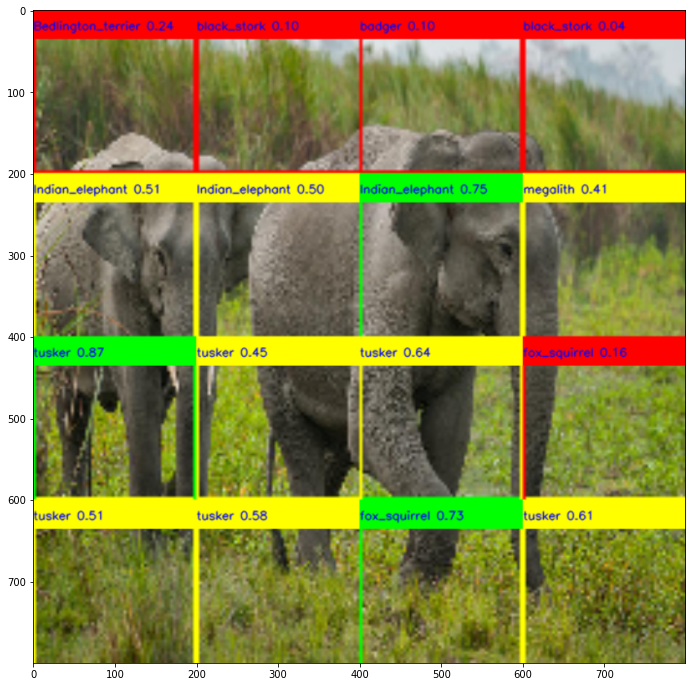

In [76]:
# using the cv2 module and based on the percentage
# this part crops the whole image into boxes and predicts the portion of the image where it belongs

img_draw = img_arr.copy()

font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 0.4
thickness = 1
# BGR
red = (255,0,0)
green = (0,255,0)
yellow = (255,255,0)
color_font = (0, 0, 255) 

# it requires x,y x,y as input - and not y,y x,x - that is the input for the array
for coord in coords:
    if coord[1][2]>0.7:
        color = green
    elif coord[1][2]>0.4:
        color = yellow
    else:
        color = red
    
    img_draw = cv2.rectangle(img_draw,coord[0], color, 1) 

nw = 224*3
img_draw = cv2.resize(img_draw,(nw,nw))

for coord in coords:
    if coord[1][2]>0.7:
        color = green
    elif coord[1][2]>0.4:
        color = yellow
    else:
        color = red
        
    org = (coord[0][0]*int(nw/224), coord[0][1]*int(nw/224)+20) 
    cv2.rectangle(img_draw,[org[0],org[1]-20,224,30], color, -1) 
    cv2.putText(img_draw, f"{coord[1][1]} {coord[1][2]:0.2f}", org, font, fontScale, color_font, thickness, cv2.LINE_AA) 
    
    
nw = 800
img_draw = cv2.resize(img_draw,(nw,nw))
img_draw_bgr = cv2.cvtColor(img_draw,cv2.COLOR_RGB2BGR)

cv2.imshow('test',img_draw_bgr)
cv2.waitKey(0)
cv2.imwrite('color_base_prediction.png',img_draw_bgr)
cv2.destroyAllWindows()

plt.figure(figsize=(12,12))
plt.imshow(img_draw)
plt.savefig('color_base_output.jpg')